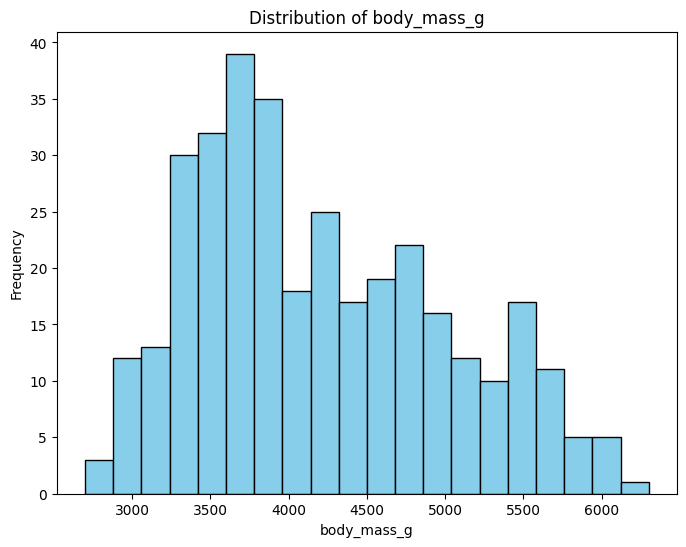

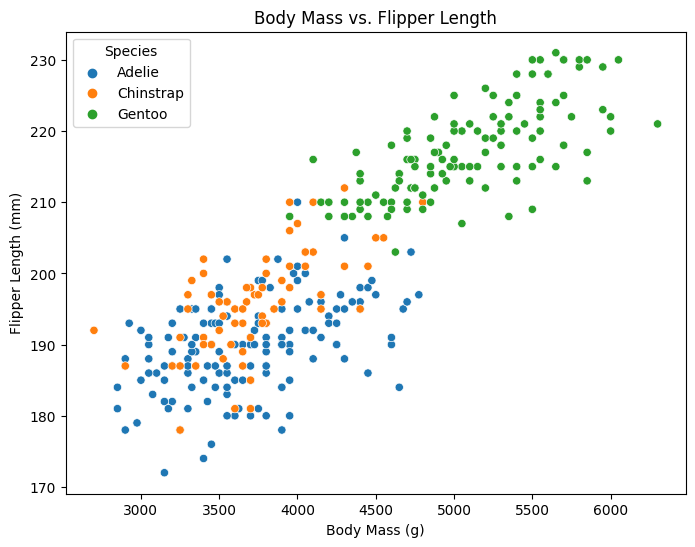

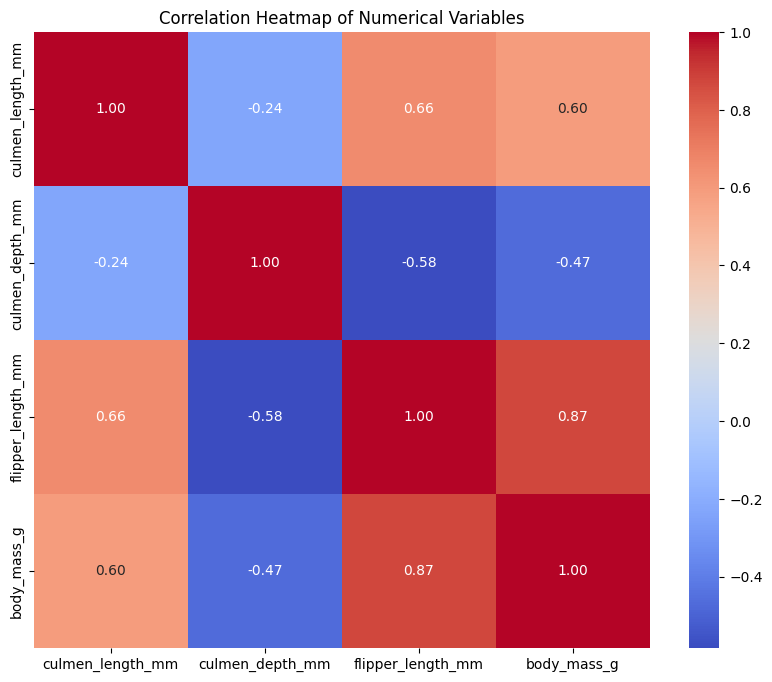

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
culmen_length_mm     1.000000
culmen_depth_mm     -0.235053
flipper_length_mm    0.656181
body_mass_g          0.595110
Name: culmen_length_mm, dtype: float64


<ipython-input-17-89cd5686a1b5>:95: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


ValueError: ignored

In [17]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual path to your dataset file
dataset_path = 'penguins_size.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)

import matplotlib.pyplot as plt

# Assuming you've already loaded the dataset into a DataFrame 'df'

# univariate analysis
column_name = 'body_mass_g'
data = df[column_name]

# Plot a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

import seaborn as sns


# Assuming you've already loaded the dataset into a DataFrame 'df'

# Select the columns for bivariate analysis
body_mass = df['body_mass_g']
flipper_length = df['flipper_length_mm']

# Create a scatter plot to visualize the relationship with different colors for each species
plt.figure(figsize=(8, 6))
sns.scatterplot(x=body_mass, y=flipper_length, hue=df['species'])
plt.title('Body Mass vs. Flipper Length')
plt.xlabel('Body Mass (g)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species')
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded the dataset into a DataFrame 'df'

# Select the numerical columns for multi-variate analysis
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()
# Assuming you've already loaded the dataset into a DataFrame 'df'

# Calculate descriptive statistics for numerical columns
descriptive_stats = df.describe()

# Display the descriptive statistics
print(descriptive_stats)
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)
import pandas as pd
import numpy as np
from scipy import stats

# Assuming you've already loaded the dataset into a DataFrame 'df'

# Define the numerical columns for outlier detection
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Loop through each numerical column to detect and replace outliers
for column in numerical_columns:
    z_scores = np.abs(stats.zscore(df[column]))
    threshold = 3  # Adjust this threshold as needed
    outliers = (z_scores > threshold)

    # Create a copy of the subset to avoid the SettingWithCopyWarning
    df_subset = df[column].copy()

    # Replace outliers in the copy
    df_subset[outliers] = df[column].median()  # Replace outliers with the median or another suitable value

    # Update the original DataFrame with the modified copy
    df[column] = df_subset

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlations with the target variable
target_correlations = correlation_matrix['culmen_length_mm']

# Display the correlations
print(target_correlations)
# Assuming you've already loaded the dataset into a DataFrame 'df'

# Perform one-hot encoding for 'Species' and 'Island' columns
df_encoded = pd.get_dummies(df, columns=['species', 'island'], drop_first=True)

# The drop_first=True option drops one of the dummy variables to avoid multicollinearity
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you've already loaded the dataset into a DataFrame 'df'













In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you've already loaded the dataset into a DataFrame 'df'

# Step 1: Split the data into dependent (target) and independent variables
X = df.drop(columns=['island', 'species','sex'])  # Independent variables (excluding 'body_mass_g' and 'Species')
y = df['body_mass_g']  # Dependent variable

# Step 2: Scale the independent variables using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)





[[-0.88449874  0.78544923 -1.41834665 -0.56414208]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305]
 [-0.66437972  0.43046236 -0.42127665 -1.18853234]
 ...
 [ 1.18828874 -0.73592307  1.50164406  1.93341896]
 [ 0.23443963 -1.19233476  0.7894512   1.24658968]
 [ 1.09657248 -0.53307343  0.86067049  1.49634578]]


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Check the shapes of the training and testing data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (240, 4)
X_test shape: (104, 4)
y_train shape: (240,)
y_test shape: (104,)
